In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/hius.csv")
df_2 = pd.read_csv("data/quickcharts_hius.csv")

#the first row is the description of the column so we should drop that as well
df = df.drop(0, axis=0)
df.head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),DATASOURCE (CODE),DATASOURCE (DISPLAY),DATASOURCE (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),PUBLISHSTATE (URL),YEAR (CODE),...,SEX (CODE),SEX (DISPLAY),SEX (URL),Display Value,Numeric,Low,High,StdErr,StdDev,Comments
1,CHOLERA_0000000001,Number of reported cases of cholera,http://apps.who.int/gho/indicatorregistry/App_...,NaN,NaN,NaN,PUBLISHED,Published,NaN,1987,...,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN
2,CHOLERA_0000000001,Number of reported cases of cholera,http://apps.who.int/gho/indicatorregistry/App_...,NaN,NaN,NaN,PUBLISHED,Published,NaN,1988,...,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN
3,CHOLERA_0000000001,Number of reported cases of cholera,http://apps.who.int/gho/indicatorregistry/App_...,NaN,NaN,NaN,PUBLISHED,Published,NaN,1990,...,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
4,CHOLERA_0000000001,Number of reported cases of cholera,http://apps.who.int/gho/indicatorregistry/App_...,NaN,NaN,NaN,PUBLISHED,Published,NaN,1991,...,NaN,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN
5,CHOLERA_0000000001,Number of reported cases of cholera,http://apps.who.int/gho/indicatorregistry/App_...,NaN,NaN,NaN,PUBLISHED,Published,NaN,1992,...,NaN,NaN,NaN,103,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df_2 = df_2.drop(0, axis=0)
df_2.head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),PUBLISHSTATE (URL),YEAR (CODE),YEAR (DISPLAY),YEAR (URL),REGION (CODE),...,SEX (CODE),SEX (DISPLAY),SEX (URL),Display Value,Numeric,Low,High,StdErr,StdDev,Comments
1,MDG_0000000001,Infant mortality rate (probability of dying be...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,1990.0,1990,NaN,AMR,...,BTSX,Both sexes,NaN,9.4,9.40000,NaN,NaN,NaN,NaN,NaN
2,MDG_0000000001,Infant mortality rate (probability of dying be...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,1991.0,1991,NaN,AMR,...,BTSX,Both sexes,NaN,9.1,9.10000,NaN,NaN,NaN,NaN,NaN
3,MDG_0000000001,Infant mortality rate (probability of dying be...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,1992.0,1992,NaN,AMR,...,BTSX,Both sexes,NaN,8.8,8.80000,NaN,NaN,NaN,NaN,NaN
4,MDG_0000000001,Infant mortality rate (probability of dying be...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,1993.0,1993,NaN,AMR,...,BTSX,Both sexes,NaN,8.5,8.50000,NaN,NaN,NaN,NaN,NaN
5,MDG_0000000001,Infant mortality rate (probability of dying be...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,1994.0,1994,NaN,AMR,...,BTSX,Both sexes,NaN,8.2,8.20000,NaN,NaN,NaN,NaN,NaN


In [3]:
# the difference between the two datasets
list(set(df.columns) - set(df_2.columns))

['DATASOURCE (URL)', 'DATASOURCE (DISPLAY)', 'DATASOURCE (CODE)']

In [4]:
for column in df.columns:
    print("{} has values:\n{}\n".format(column, df[column].unique()))
    print("-"*100)

GHO (CODE) has values:
['CHOLERA_0000000001' 'CHOLERA_0000000002' 'CHOLERA_0000000003' 'CM_01'
 'CM_02' 'CM_03' 'DEVICES22' 'HIV_0000000020' 'MDG_0000000001'
 'MDG_0000000003' 'MDG_0000000005' 'MDG_0000000006' 'MDG_0000000007'
 'MDG_0000000017' 'MDG_0000000020' 'MDG_0000000023' 'MDG_0000000025'
 'MDG_0000000026' 'MDG_0000000027' 'MDG_0000000029' 'MDG_0000000031'
 'MDG_0000000033' 'MH_17' 'MH_18' 'MH_6' 'NUTRITION_564' 'SA_0000001688'
 'TB_1' 'TB_tot_newrel' 'TOBACCO_0000000192' 'WHOSIS_000001'
 'WHOSIS_000003' 'WHOSIS_000005' 'WHOSIS_000009' 'WHOSIS_000015' 'WHS10_1'
 'WHS10_8' 'WHS10_9' 'WHS2_138' 'WHS2_164' 'WHS2_165' 'WHS2_166'
 'WHS2_167' 'WHS2_168' 'WHS2_170' 'WHS2_171' 'WHS2_174' 'WHS2_514'
 'WHS2_515' 'WHS2_516' 'WHS2_523' 'WHS3_40' 'WHS3_41' 'WHS3_43' 'WHS3_45'
 'WHS3_46' 'WHS3_49' 'WHS3_50' 'WHS3_52' 'WHS3_53' 'WHS3_55' 'WHS3_56'
 'WHS3_57' 'WHS3_62' 'WHS4_100' 'WHS4_115' 'WHS4_117' 'WHS4_129'
 'WHS4_154' 'WHS6_102' 'WHS6_123' 'WHS6_125' 'WHS6_127' 'WHS6_144'
 'WHS6_148' 'WHS6

In [5]:
#figuring out how many nans per column
print(df.shape)
df.isna().sum()

(1487, 31)


GHO (CODE)                           0
GHO (DISPLAY)                        0
GHO (URL)                            0
DATASOURCE (CODE)                 1430
DATASOURCE (DISPLAY)              1430
DATASOURCE (URL)                  1430
PUBLISHSTATE (CODE)                  0
PUBLISHSTATE (DISPLAY)               0
PUBLISHSTATE (URL)                1487
YEAR (CODE)                          0
YEAR (DISPLAY)                       0
YEAR (URL)                        1487
REGION (CODE)                       12
REGION (DISPLAY)                    12
REGION (URL)                      1487
WORLDBANKINCOMEGROUP (CODE)        674
WORLDBANKINCOMEGROUP (DISPLAY)     674
WORLDBANKINCOMEGROUP (URL)        1487
COUNTRY (CODE)                       0
COUNTRY (DISPLAY)                    0
COUNTRY (URL)                     1487
SEX (CODE)                        1153
SEX (DISPLAY)                     1153
SEX (URL)                         1487
Display Value                        0
Numeric                  

In [6]:
#separating diseases

disList = df['GHO (CODE)'].unique()

diseases = []
for i in disList:
    tempDis = df[df['GHO (CODE)'] == i]
    diseases.append(tempDis)
    
#nan values for each disease df
for i in range(len(diseases)):
    print(diseases[i].head())

# for i in diseases[1]:
    
#     x = i.values[:, :-1]

#     nan_count = i.isna().sum()
#     nan_percentage = [count / x.shape[0] for count in nan_count]
#     columns = i.columns

#     threshold = 0.6

#     # And let's plot those
#     fig1 = plt.figure(figsize=(30,15))
#     ax = fig1.add_subplot(111)
#     plt.axhline(y=threshold,linewidth=1, color="k")
#     ax.bar(columns, nan_percentage)
#     plt.xticks(rotation=90)
#     ax.set_xlabel('Column')
#     ax.set_ylabel('NaN Count')
#     ax.set_title('Columns with missing values')
    

           GHO (CODE)                        GHO (DISPLAY)  \
1  CHOLERA_0000000001  Number of reported cases of cholera   
2  CHOLERA_0000000001  Number of reported cases of cholera   
3  CHOLERA_0000000001  Number of reported cases of cholera   
4  CHOLERA_0000000001  Number of reported cases of cholera   
5  CHOLERA_0000000001  Number of reported cases of cholera   

                                           GHO (URL) DATASOURCE (CODE)  \
1  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
2  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
3  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
4  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
5  http://apps.who.int/gho/indicatorregistry/App_...               NaN   

  DATASOURCE (DISPLAY) DATASOURCE (URL) PUBLISHSTATE (CODE)  \
1                  NaN              NaN           PUBLISHED   
2                  NaN              NaN           PUBLIS

    GHO (CODE)                          GHO (DISPLAY)  \
138      CM_03  Number of neonatal deaths (thousands)   
139      CM_03  Number of neonatal deaths (thousands)   
140      CM_03  Number of neonatal deaths (thousands)   
141      CM_03  Number of neonatal deaths (thousands)   
142      CM_03  Number of neonatal deaths (thousands)   

                                             GHO (URL) DATASOURCE (CODE)  \
138  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
139  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
140  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
141  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
142  http://apps.who.int/gho/indicatorregistry/App_...               NaN   

    DATASOURCE (DISPLAY) DATASOURCE (URL) PUBLISHSTATE (CODE)  \
138                  NaN              NaN           PUBLISHED   
139                  NaN              NaN           PUBLISHED   
140  

[5 rows x 31 columns]
         GHO (CODE)                                    GHO (DISPLAY)  \
349  MDG_0000000025  Births attended by skilled health personnel (%)   

                                             GHO (URL) DATASOURCE (CODE)  \
349  http://apps.who.int/gho/indicatorregistry/App_...               NaN   

    DATASOURCE (DISPLAY) DATASOURCE (URL) PUBLISHSTATE (CODE)  \
349                  NaN              NaN           PUBLISHED   

    PUBLISHSTATE (DISPLAY)  PUBLISHSTATE (URL) YEAR (CODE)  ... SEX (CODE)  \
349              Published                 NaN        2017  ...        NaN   

     SEX (DISPLAY) SEX (URL) Display Value   Numeric Low High  StdErr StdDev  \
349            NaN       NaN          99.1  99.10000 NaN  NaN     NaN    NaN   

                                              Comments  
349  Source: National Center for Health Statistics ...  

[1 rows x 31 columns]
         GHO (CODE)                                      GHO (DISPLAY)  \
350  MDG_0000000026 

    GHO (CODE)                              GHO (DISPLAY)  \
395      MH_17  Mental hospitals (per 100 000 population)   

                                             GHO (URL) DATASOURCE (CODE)  \
395  http://apps.who.int/gho/indicatorregistry/App_...               NaN   

    DATASOURCE (DISPLAY) DATASOURCE (URL) PUBLISHSTATE (CODE)  \
395                  NaN              NaN           PUBLISHED   

    PUBLISHSTATE (DISPLAY)  PUBLISHSTATE (URL) YEAR (CODE)  ... SEX (CODE)  \
395              Published                 NaN        2016  ...        NaN   

     SEX (DISPLAY) SEX (URL) Display Value  Numeric Low High  StdErr StdDev  \
395            NaN       NaN         0.189  0.18910 NaN  NaN     NaN    NaN   

    Comments  
395      NaN  

[1 rows x 31 columns]
    GHO (CODE)                                      GHO (DISPLAY)  \
396      MH_18  Mental health units in general hospitals (per ...   

                                             GHO (URL) DATASOURCE (CODE)  \
396  http

[5 rows x 31 columns]
    GHO (CODE)              GHO (DISPLAY)  \
622    WHS10_1  Most recent census (year)   

                                             GHO (URL) DATASOURCE (CODE)  \
622  http://apps.who.int/gho/indicatorregistry/App_...               NaN   

    DATASOURCE (DISPLAY) DATASOURCE (URL) PUBLISHSTATE (CODE)  \
622                  NaN              NaN           PUBLISHED   

    PUBLISHSTATE (DISPLAY)  PUBLISHSTATE (URL) YEAR (CODE)  ... SEX (CODE)  \
622              Published                 NaN        2010  ...        NaN   

     SEX (DISPLAY) SEX (URL) Display Value     Numeric Low High  StdErr  \
622            NaN       NaN          2010  2010.00000 NaN  NaN     NaN   

    StdDev                                           Comments  
622    NaN  Traditional decennial census with full field e...  

[1 rows x 31 columns]
    GHO (CODE)                                      GHO (DISPLAY)  \
623    WHS10_8  Civil registration coverage of cause-of-death (%)   
624   

[5 rows x 31 columns]
    GHO (CODE)                GHO (DISPLAY)  \
838    WHS3_45  Number of new leprosy cases   
839    WHS3_45  Number of new leprosy cases   
840    WHS3_45  Number of new leprosy cases   
841    WHS3_45  Number of new leprosy cases   
842    WHS3_45  Number of new leprosy cases   

                                             GHO (URL) DATASOURCE (CODE)  \
838  http://apps.who.int/gho/data/node.wrapper.imr?...               NaN   
839  http://apps.who.int/gho/data/node.wrapper.imr?...               NaN   
840  http://apps.who.int/gho/data/node.wrapper.imr?...               NaN   
841  http://apps.who.int/gho/data/node.wrapper.imr?...               NaN   
842  http://apps.who.int/gho/data/node.wrapper.imr?...               NaN   

    DATASOURCE (DISPLAY) DATASOURCE (URL) PUBLISHSTATE (CODE)  \
838                  NaN              NaN           PUBLISHED   
839                  NaN              NaN           PUBLISHED   
840                  NaN              NaN  

[2 rows x 31 columns]
    GHO (CODE)                     GHO (DISPLAY)  \
945    WHS3_53  Mumps - number of reported cases   
946    WHS3_53  Mumps - number of reported cases   
947    WHS3_53  Mumps - number of reported cases   
948    WHS3_53  Mumps - number of reported cases   
949    WHS3_53  Mumps - number of reported cases   

                                             GHO (URL) DATASOURCE (CODE)  \
945  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
946  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
947  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
948  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
949  http://apps.who.int/gho/indicatorregistry/App_...               NaN   

    DATASOURCE (DISPLAY) DATASOURCE (URL) PUBLISHSTATE (CODE)  \
945                  NaN              NaN           PUBLISHED   
946                  NaN              NaN           PUBLISHED   
947          

[5 rows x 31 columns]
     GHO (CODE)                                      GHO (DISPLAY)  \
1160   WHS4_154  Antenatal care coverage - at least four visits...   
1161   WHS4_154  Antenatal care coverage - at least four visits...   
1162   WHS4_154  Antenatal care coverage - at least four visits...   
1163   WHS4_154  Antenatal care coverage - at least four visits...   
1164   WHS4_154  Antenatal care coverage - at least four visits...   

                                              GHO (URL) DATASOURCE (CODE)  \
1160  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
1161  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
1162  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
1163  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
1164  http://apps.who.int/gho/indicatorregistry/App_...               NaN   

     DATASOURCE (DISPLAY) DATASOURCE (URL) PUBLISHSTATE (CODE)  \
1160                  NaN   

     GHO (CODE)                       GHO (DISPLAY)  \
1178   WHS6_517  Number of pharmaceutical personnel   

                                              GHO (URL) DATASOURCE (CODE)  \
1178  http://apps.who.int/gho/indicatorregistry/App_...               NaN   

     DATASOURCE (DISPLAY) DATASOURCE (URL) PUBLISHSTATE (CODE)  \
1178                  NaN              NaN           PUBLISHED   

     PUBLISHSTATE (DISPLAY)  PUBLISHSTATE (URL) YEAR (CODE)  ... SEX (CODE)  \
1178              Published                 NaN        2000  ...        NaN   

      SEX (DISPLAY) SEX (URL) Display Value  Numeric Low High  StdErr StdDev  \
1178            NaN       NaN        249642      NaN NaN  NaN     NaN    NaN   

     Comments  
1178      NaN  

[1 rows x 31 columns]
     GHO (CODE)                                      GHO (DISPLAY)  \
1179   WHS6_519  Density of pharmaceutical personnel (per 10 00...   

                                              GHO (URL) DATASOURCE (CODE)  \
1179  ht

[5 rows x 31 columns]
     GHO (CODE)                                      GHO (DISPLAY)  \
1300   WHS7_139  Out-of-pocket expenditure as a percentage of p...   
1301   WHS7_139  Out-of-pocket expenditure as a percentage of p...   
1302   WHS7_139  Out-of-pocket expenditure as a percentage of p...   
1303   WHS7_139  Out-of-pocket expenditure as a percentage of p...   
1304   WHS7_139  Out-of-pocket expenditure as a percentage of p...   

                                              GHO (URL) DATASOURCE (CODE)  \
1300  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
1301  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
1302  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
1303  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
1304  http://apps.who.int/gho/indicatorregistry/App_...               NaN   

     DATASOURCE (DISPLAY) DATASOURCE (URL) PUBLISHSTATE (CODE)  \
1300                  NaN   

     GHO (CODE)                                  GHO (DISPLAY)  \
1446    WHS9_93  Gross national income per capita (PPP int. $)   
1447    WHS9_93  Gross national income per capita (PPP int. $)   
1448    WHS9_93  Gross national income per capita (PPP int. $)   
1449    WHS9_93  Gross national income per capita (PPP int. $)   
1450    WHS9_93  Gross national income per capita (PPP int. $)   

                                              GHO (URL) DATASOURCE (CODE)  \
1446  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
1447  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
1448  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
1449  http://apps.who.int/gho/indicatorregistry/App_...               NaN   
1450  http://apps.who.int/gho/indicatorregistry/App_...               NaN   

     DATASOURCE (DISPLAY) DATASOURCE (URL) PUBLISHSTATE (CODE)  \
1446                  NaN              NaN           PUBLISHED   
1447    

### Conclusion:

The set is as good as complete, but some columns only apply to some diseases/conditions
So, we will remove all unimportant columns for each disease.

In [7]:
for k in range(len(diseases)):
    i = diseases[k]
    x = i.values[:, :-1]

    nan_count = i.isna().sum()
    nan_percentage = [count / x.shape[0] for count in nan_count]
    columns = i.columns

    threshold = 0.6

    too_much_cols = []
    for j in range(len(columns)):
        if nan_percentage[j] >= threshold:
            too_much_cols.append(columns[j])
    diseases[k] = diseases[k].drop(too_much_cols, axis=1)
    
    
diseases[0].head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),YEAR (CODE),YEAR (DISPLAY),REGION (CODE),REGION (DISPLAY),COUNTRY (CODE),COUNTRY (DISPLAY),Display Value,Comments
1,CHOLERA_0000000001,Number of reported cases of cholera,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,1987,1987,AMR,Americas,USA,United States of America,6,NaN
2,CHOLERA_0000000001,Number of reported cases of cholera,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,1988,1988,AMR,Americas,USA,United States of America,9,NaN
3,CHOLERA_0000000001,Number of reported cases of cholera,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,1990,1990,AMR,Americas,USA,United States of America,7,NaN
4,CHOLERA_0000000001,Number of reported cases of cholera,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,1991,1991,AMR,Americas,USA,United States of America,26,NaN
5,CHOLERA_0000000001,Number of reported cases of cholera,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,1992,1992,AMR,Americas,USA,United States of America,103,NaN


In [8]:
print(diseases[0].dtypes)

GHO (CODE)                object
GHO (DISPLAY)             object
GHO (URL)                 object
PUBLISHSTATE (CODE)       object
PUBLISHSTATE (DISPLAY)    object
YEAR (CODE)               object
YEAR (DISPLAY)            object
REGION (CODE)             object
REGION (DISPLAY)          object
COUNTRY (CODE)            object
COUNTRY (DISPLAY)         object
Display Value             object
Comments                  object
dtype: object


All values are objects, change to numeric values.

In [9]:
print(len(diseases))

101


In [10]:
print(diseases[10].filter(items=['YEAR (CODE)', 'Display Value']))
for i in range(len(diseases)):
    for index, row in diseases[i].iterrows():
        if type(row['YEAR (CODE)']) == str:
            split_years = row['YEAR (CODE)'].split('-')
            if len(split_years) > 1:
                diseases[i].loc[index, 'YEAR (CODE)'] = int((int(split_years[0]) + int(split_years[1]))/2)  
        if diseases[i].loc[index, 'Display Value'] == 'No' or diseases[i].loc[index, 'Display Value'] == 'No data' or diseases[i].loc[index, 'Display Value'] == '' or diseases[i].loc[index, 'Display Value'] == ' ':
            diseases[i].loc[index, 'Display Value'] = np.nan
        if type(diseases[i].loc[index, 'Display Value']) == str:
            while " " in diseases[i].loc[index, 'Display Value']:
                split = row['Display Value'].split(" ")
                diseases[i].loc[index, 'Display Value'] = split[0]
            while "[" in diseases[i].loc[index, 'Display Value']:
                split = row['Display Value'].split("[")
                diseases[i].loc[index, 'Display Value'] = split[0]
            if "<" in diseases[i].loc[index, 'Display Value']:
                split = row['Display Value'].split("<")
                diseases[i].loc[index, 'Display Value'] = split[1]
        
        #print('disease ', i, ' ', diseases[i].loc[index, 'YEAR (CODE)'], ' ', diseases[i].loc[index, 'Display Value'])

    YEAR (CODE) Display Value
198        2008          78.6
199        2010          76.4
disease  0   1987   6
disease  0   1988   9
disease  0   1990   7
disease  0   1991   26
disease  0   1992   103
disease  0   1993   19
disease  0   1994   47
disease  0   1995   19
disease  0   1996   3
disease  0   1997   4
disease  0   1998   17
disease  0   1999   6
disease  0   2000   4
disease  0   2001   4
disease  0   2002   2
disease  0   2003   2
disease  0   2004   5
disease  0   2005   12
disease  0   2006   8
disease  0   2007   7
disease  0   2008   5
disease  0   2009   10
disease  0   2010   15
disease  0   2011   42
disease  0   2012   18
disease  0   2013   14
disease  0   2014   7
disease  0   2015   4
disease  0   2016   14
disease  1   1987   0
disease  1   1988   0
disease  1   1990   0
disease  1   1991   0
disease  1   1992   1
disease  1   1993   0
disease  1   1994   0
disease  1   1995   0
disease  1   1996   0
disease  1   1997   0
disease  1   1998   0
disease  1   199

disease  15   2009   5.4
disease  15   2010   5.1
disease  15   2011   4.8
disease  15   2012   4.5
disease  15   2013   4.1
disease  15   2014   3.8
disease  16   2017   99.1
disease  17   1990   
disease  17   2000   
disease  17   2015   
disease  18   1969   3.7
disease  18   1991   3.2
disease  18   1991   3.1
disease  18   1991   3.3
disease  18   2000   3.3
disease  18   2000   2.4
disease  18   2000   4.1
disease  18   2001   3.9
disease  18   2001   3.2
disease  18   2001   4.5
disease  18   2004   3.2
disease  18   2004   2.4
disease  18   2004   3.9
disease  18   2008   2.7
disease  18   2008   2.2
disease  18   2008   3.2
disease  18   2011   2.1
disease  18   2011   1.2
disease  18   2011   3.0
disease  19   2000   nan
disease  19   2005   nan
disease  19   2010   nan
disease  19   2017   nan
disease  20   1994   72
disease  20   1995   76
disease  20   1996   79
disease  20   1997   79
disease  20   1998   81
disease  20   1999   82
disease  20   2000   83
disease  20   2

disease  43   2000   0
disease  43   2001   0
disease  43   2002   0
disease  43   2003   0
disease  43   2004   0
disease  43   2005   0
disease  43   2006   0
disease  43   2007   0
disease  43   2008   0
disease  43   2009   0
disease  43   2010   0
disease  44   2000   0
disease  44   2001   0
disease  44   2002   0
disease  44   2003   0
disease  44   2004   0
disease  44   2005   0
disease  44   2006   0
disease  44   2007   0
disease  44   2008   0
disease  44   2009   0
disease  44   2010   0
disease  45   2000   27
disease  45   2001   26
disease  45   2002   27
disease  45   2003   28
disease  45   2004   27
disease  45   2005   28
disease  45   2006   28
disease  45   2007   26
disease  45   2008   26
disease  45   2009   26
disease  45   2010   26
disease  46   2008   19
disease  47   2000   27
disease  47   2001   28
disease  47   2002   27
disease  47   2003   27
disease  47   2004   26
disease  47   2005   27
disease  47   2006   26
disease  47   2007   19
disease  47   

disease  64   2016   95
disease  64   2017   95
disease  65   2015   32.0
disease  66   1993   16
disease  66   1994   42
disease  66   1995   68
disease  66   1996   82
disease  66   1997   84
disease  66   1998   87
disease  66   1999   88
disease  66   2000   90
disease  66   2001   89
disease  66   2002   88
disease  66   2003   92
disease  66   2004   92
disease  66   2005   93
disease  66   2006   93
disease  66   2007   93
disease  66   2008   94
disease  66   2009   92
disease  66   2010   92
disease  66   2011   91
disease  66   2012   90
disease  66   2013   91
disease  66   2014   92
disease  66   2015   92
disease  66   2016   93
disease  66   2017   93
disease  67   1995   91
disease  67   1996   91
disease  67   1997   93
disease  67   1998   93
disease  67   1999   94
disease  67   2000   93
disease  67   2001   93
disease  67   2002   93
disease  67   2003   94
disease  67   2004   94
disease  67   2005   94
disease  67   2006   93
disease  67   2007   93
disease  67   

disease  88   2002   91
disease  88   2003   93
disease  88   2004   93
disease  88   2005   92
disease  88   2006   92
disease  88   2007   92
disease  88   2008   92
disease  88   2009   90
disease  88   2010   92
disease  88   2011   92
disease  88   2012   91
disease  88   2013   92
disease  88   2014   92
disease  88   2015   92
disease  88   2016   92
disease  88   2017   92
disease  89   2016   322
disease  90   2012   37.3
disease  90   2013   37.4
disease  91   2016   19.0
disease  92   2010   2.0
disease  93   2009   100
disease  93   2015   100
disease  94   2016   195.6
disease  95   1990   23730
disease  95   1991   24180
disease  95   1992   25180
disease  95   1993   26000
disease  95   1994   27350
disease  95   1995   28550
disease  95   1996   29980
disease  95   1997   31620
disease  95   1998   33230
disease  95   1999   34850
disease  95   2000   36930
disease  95   2001   37860
disease  95   2002   38590
disease  95   2003   39960
disease  95   2004   42260
diseas

In [11]:
diseases[53].loc[diseases[53]['YEAR (CODE)'] == '2009', 'Display Value'] = np.nan
diseases[95].loc[diseases[95]['YEAR (CODE)'] == '2013', 'Display Value'] = 53960

In [17]:
for i in range(len(diseases)):
    diseases[i]['YEAR (CODE)'].astype(int)
    diseases[i]['Display Value'] = pd.to_numeric(diseases[i]['Display Value'],errors='coerce')

1       6
2       9
3       7
4      26
5     103
6      19
7      47
8      19
9       3
10      4
11     17
12      6
13      4
14      4
15      2
16      2
17      5
18     12
19      8
20      7
21      5
22     10
23     15
24     42
25     18
26     14
27      7
28      4
29     14
Name: Display Value, dtype: int64
30    0
31    0
32    0
33    0
34    1
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
Name: Display Value, dtype: int64
56    0.00
57    0.00
58    0.00
59    0.00
60    0.97
61    0.00
62    0.00
63    0.00
64    0.00
65    0.00
66    0.00
67    0.00
68    0.00
69    0.00
70    0.00
71    0.00
72    0.00
73    0.00
74    0.00
75    0.00
76    0.00
77    0.00
78    0.00
79    0.00
80    0.00
81    0.00
Name: Display Value, dtype: float64
82     44
83     43
84     42
85     40
86     39
87     38
88     36
89     35
90     34
91     34
92     33
93

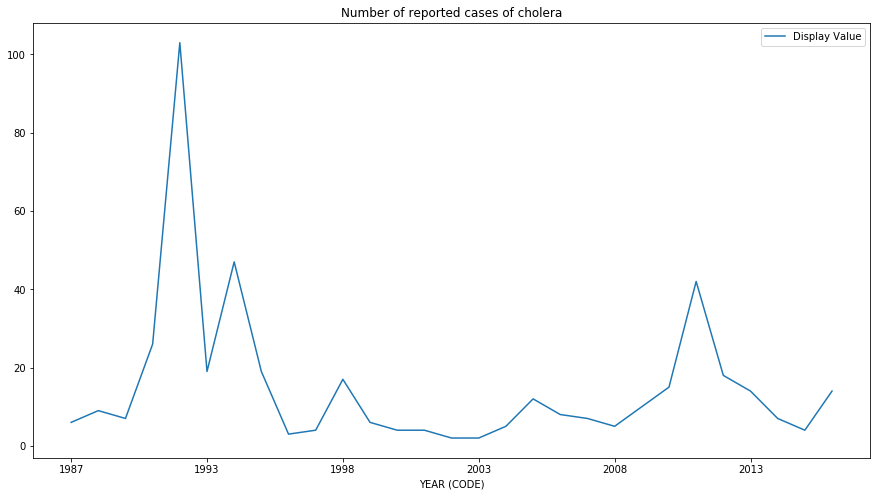

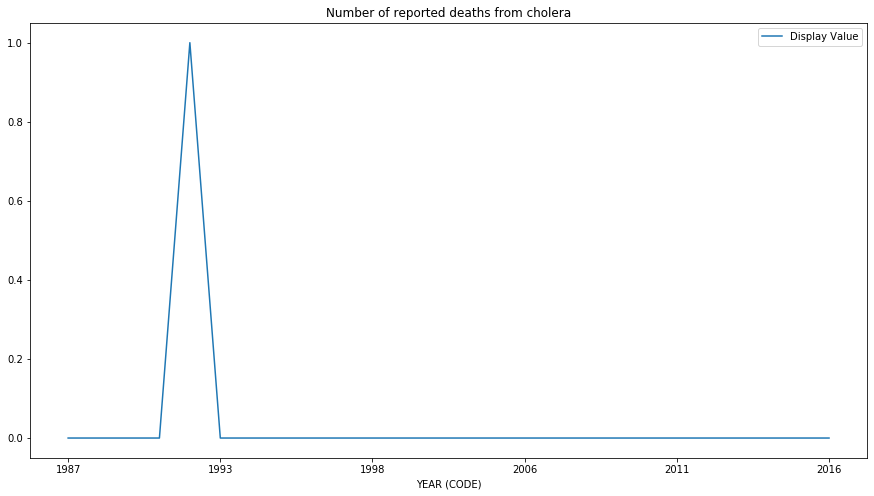

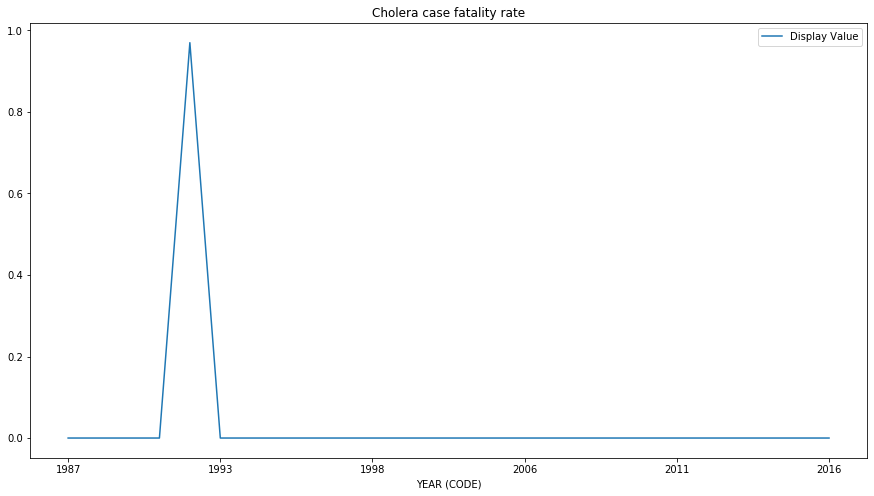

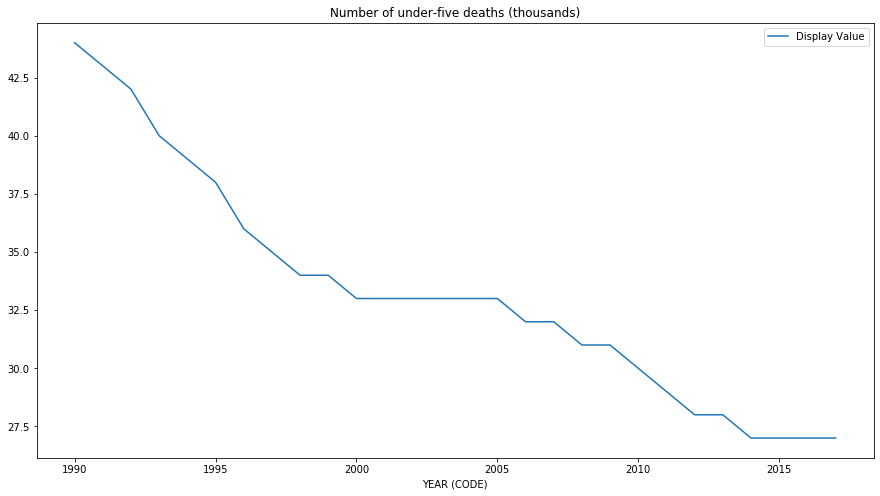

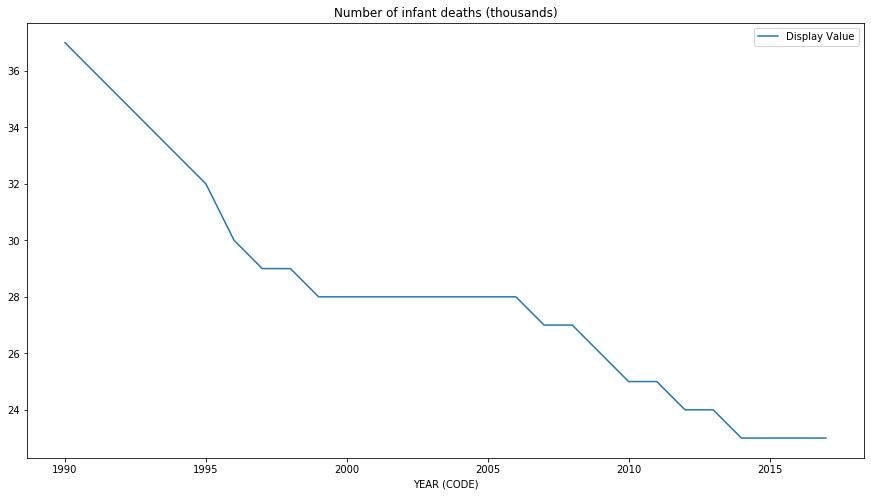

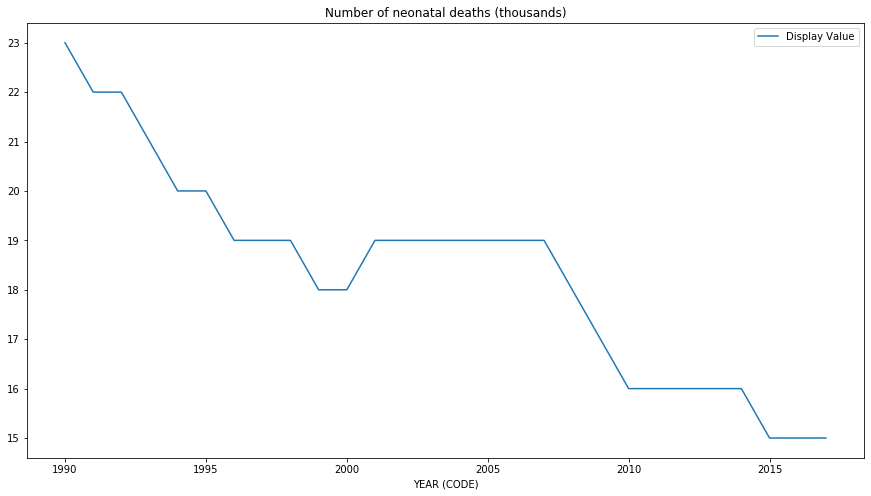

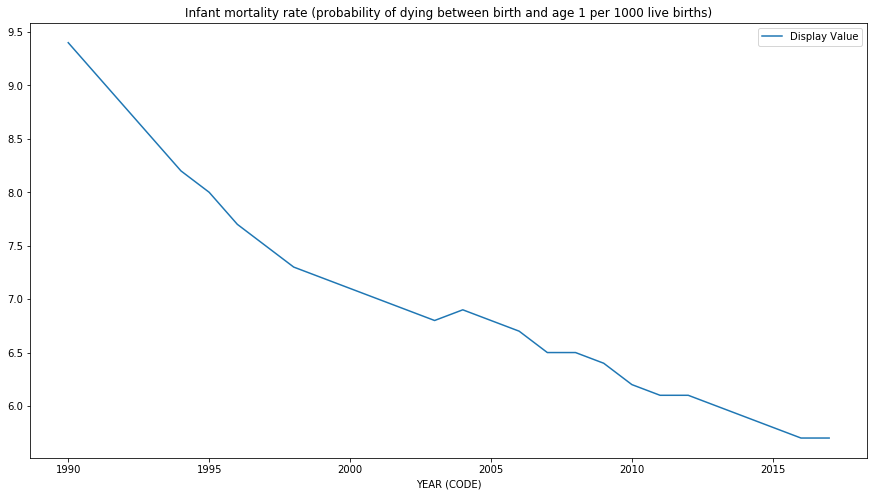

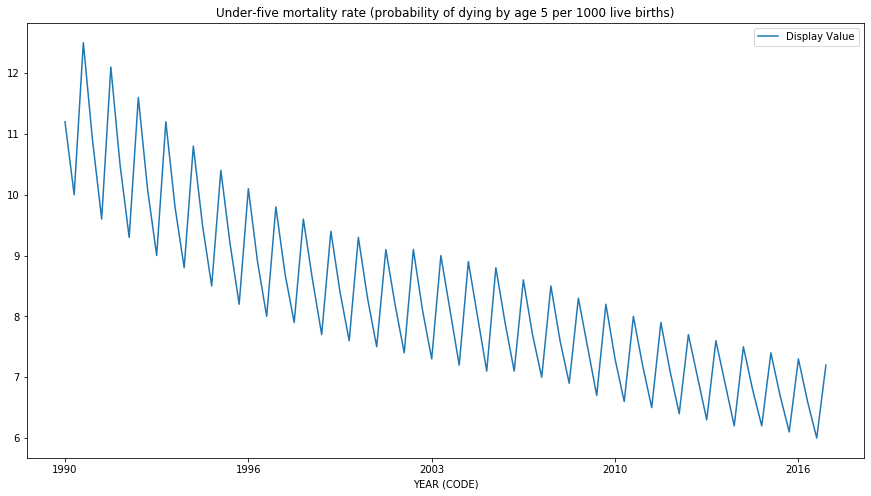

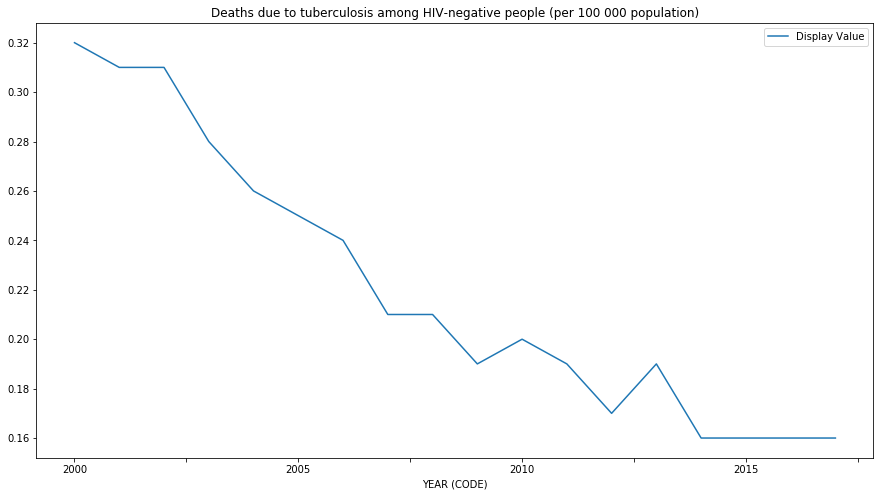

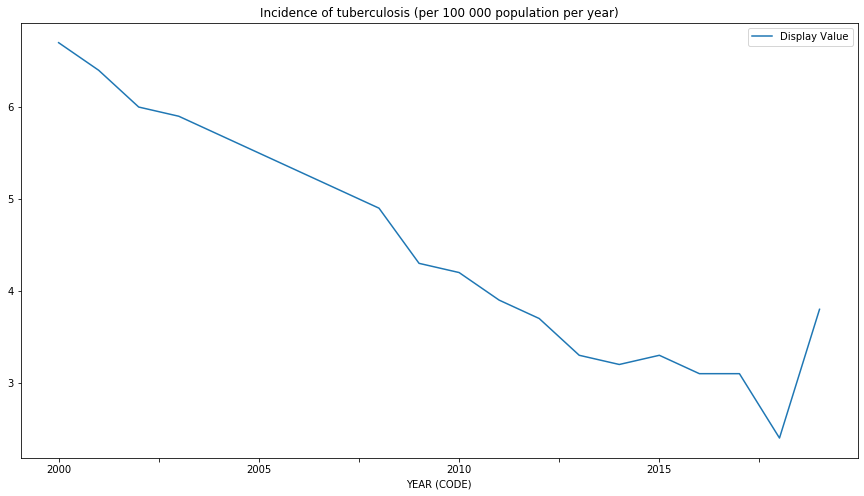

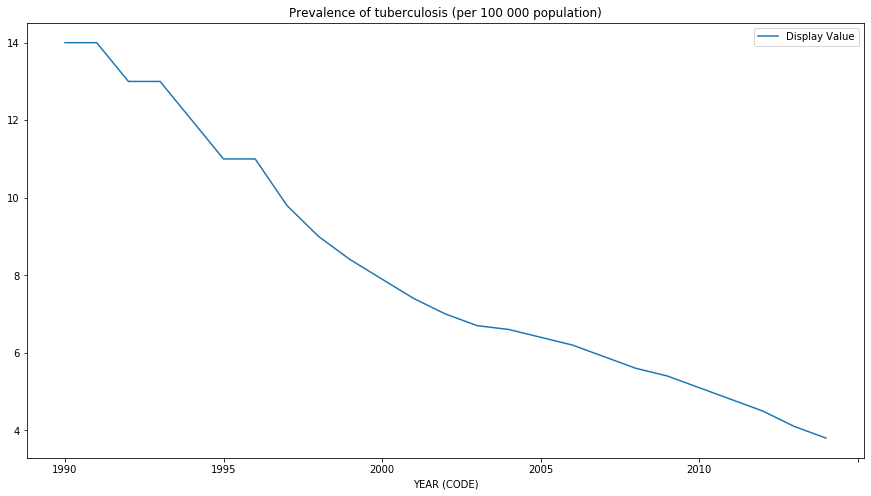

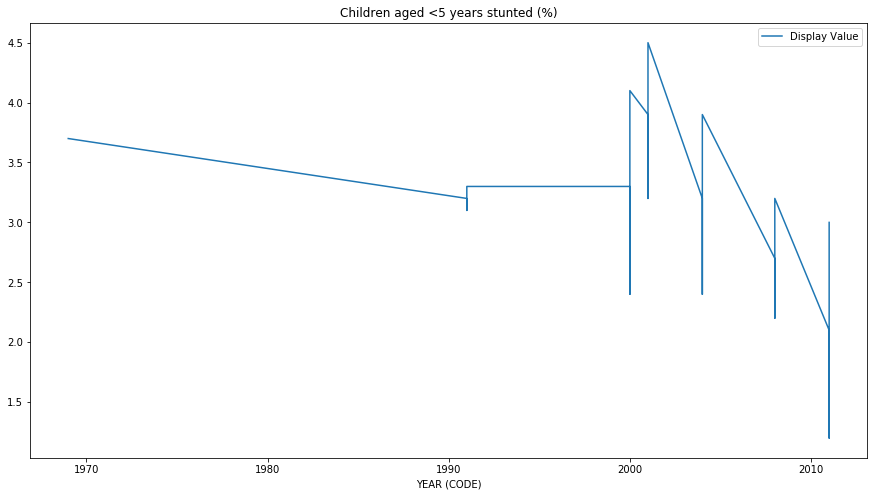

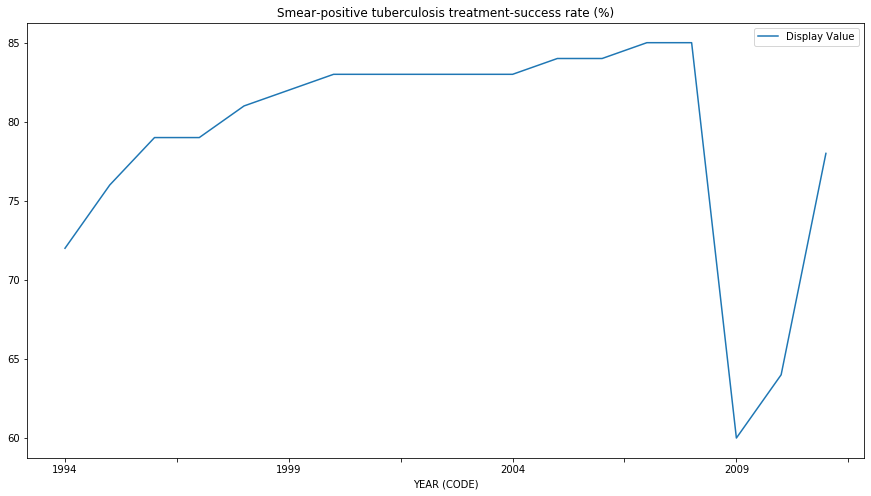

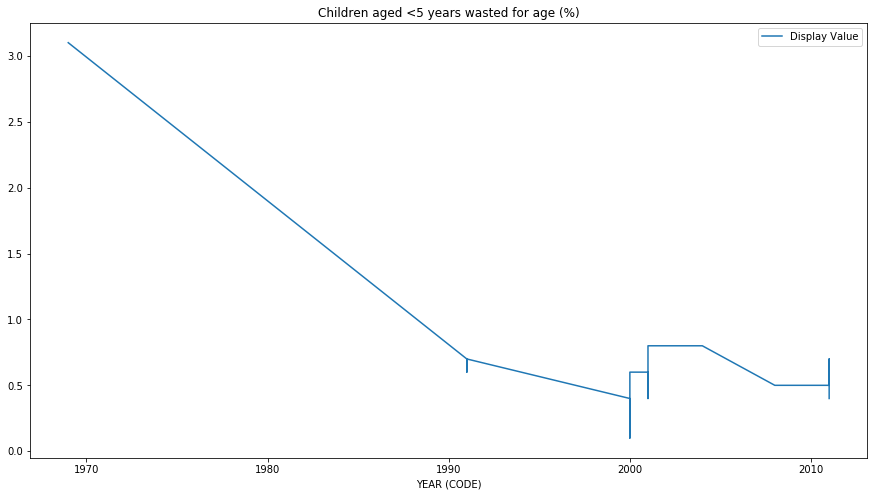

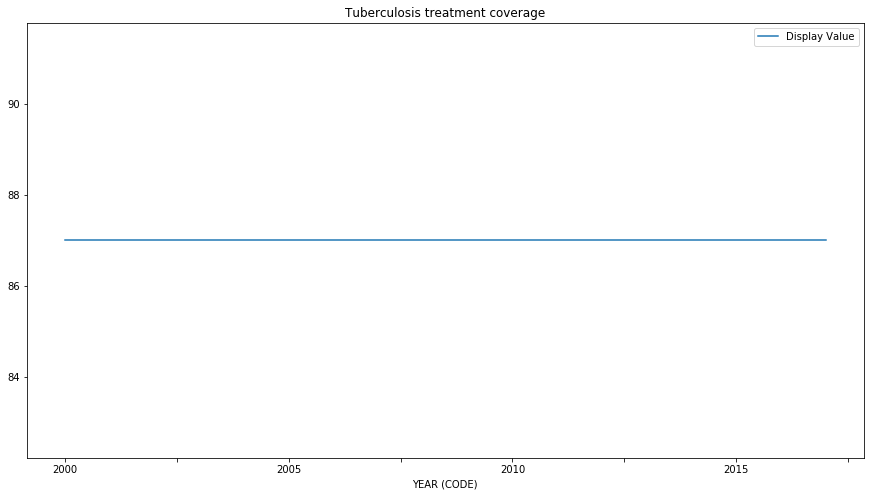

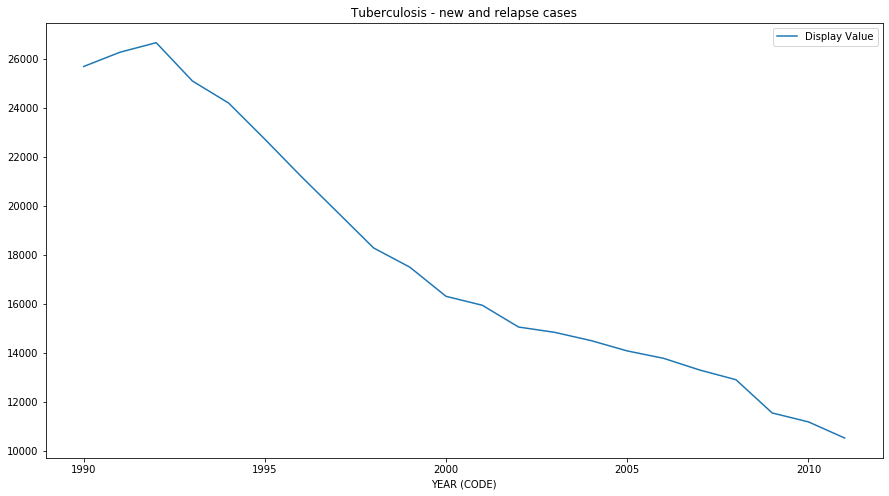

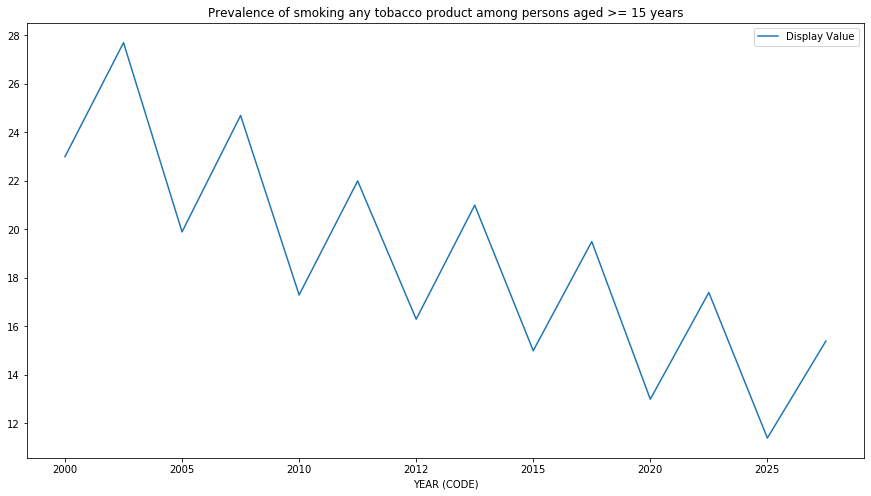

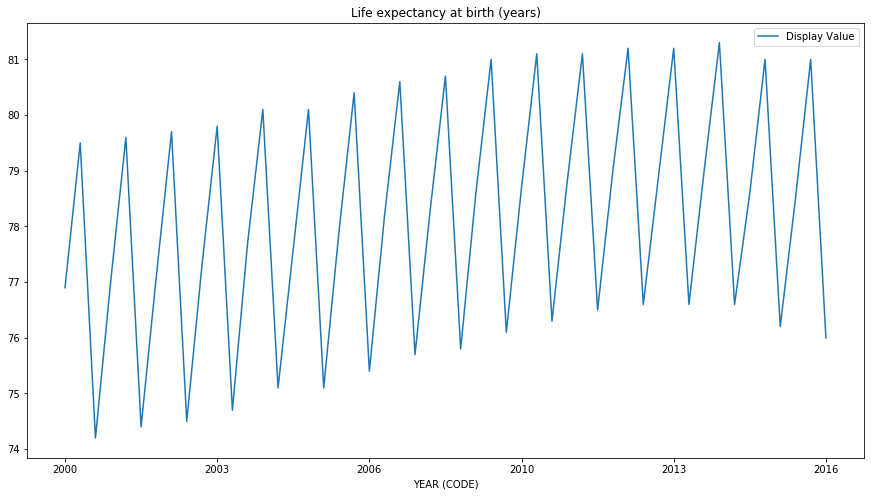

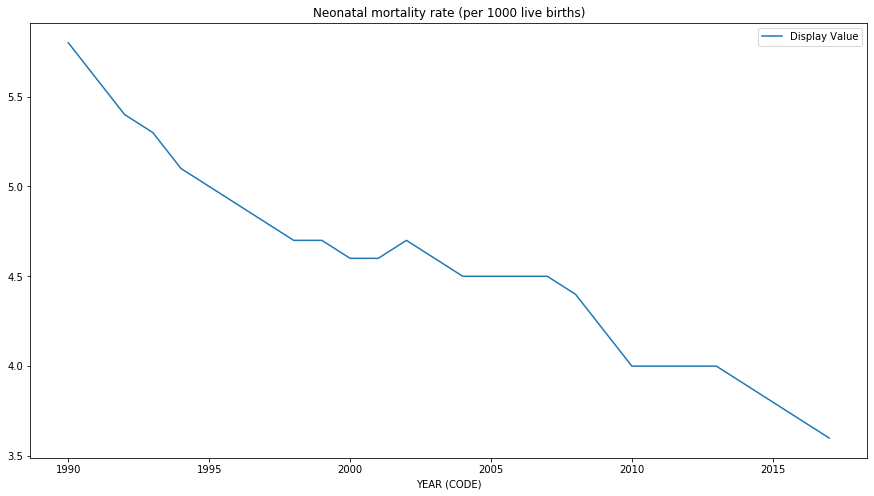

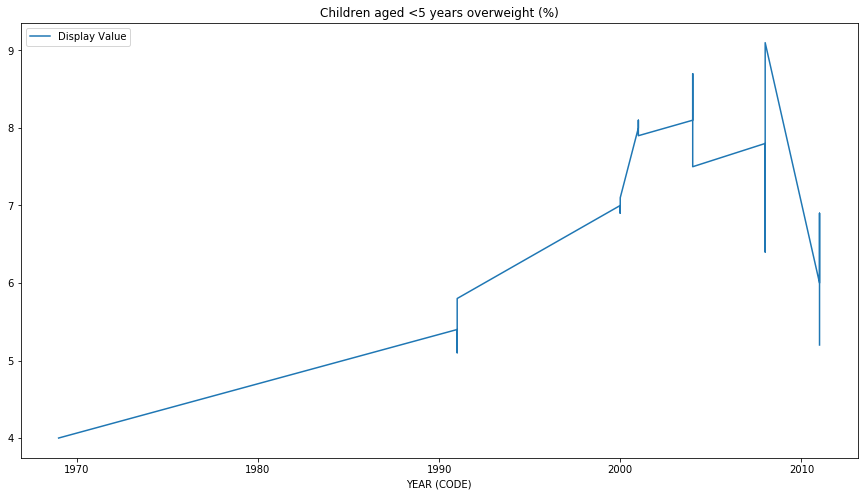

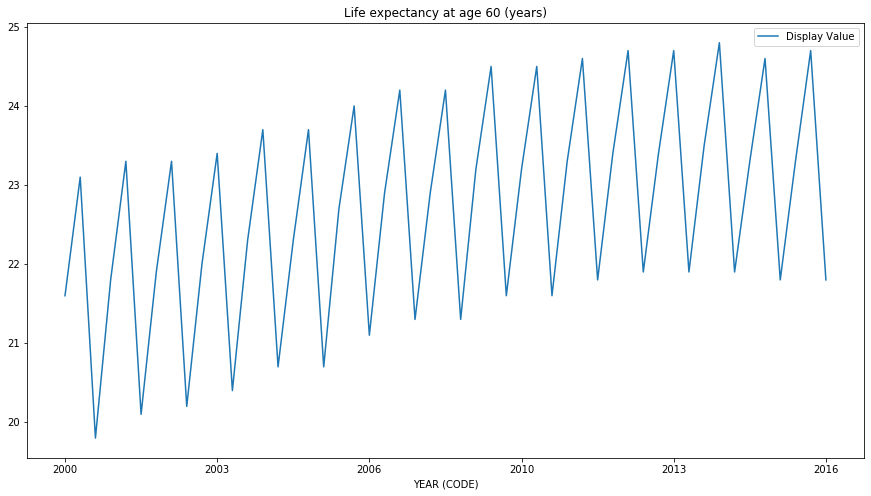

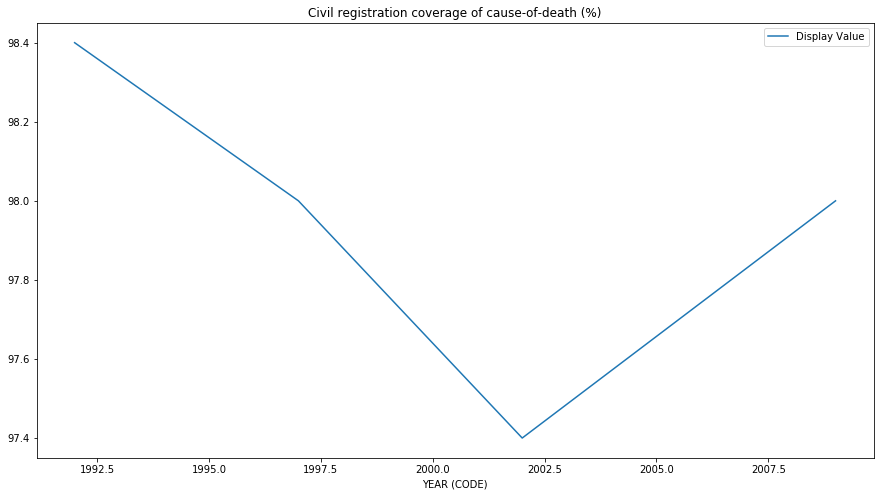

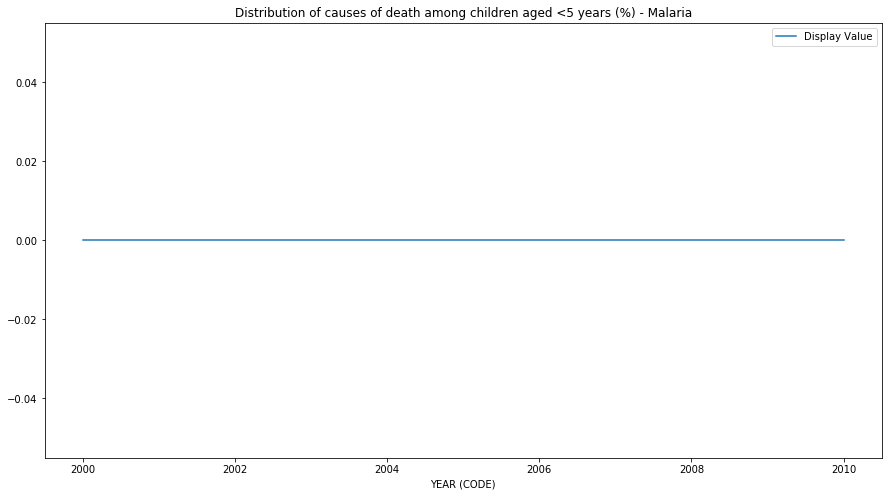

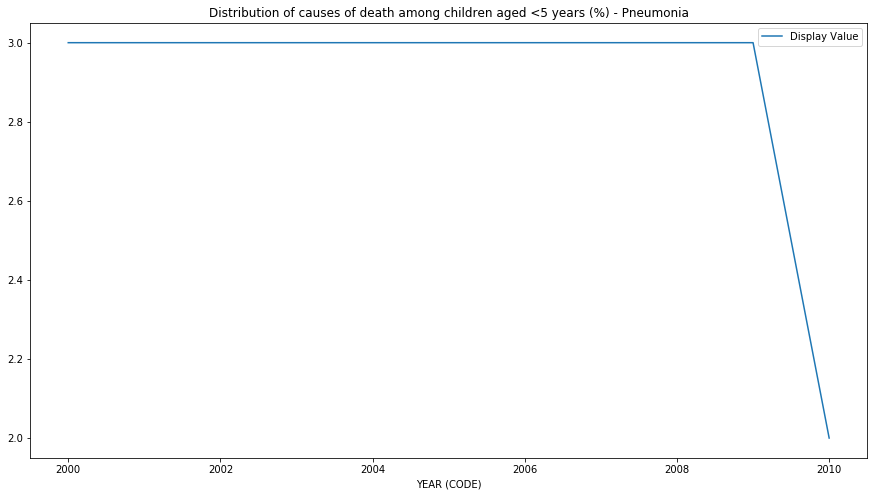

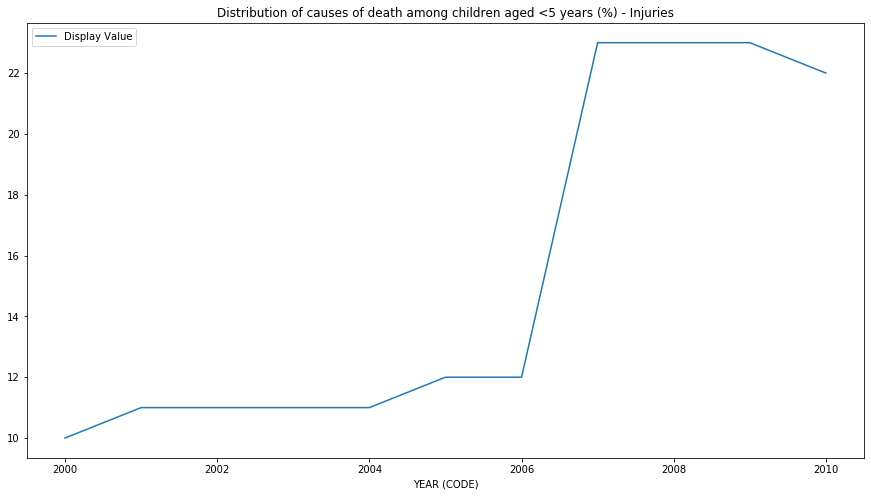

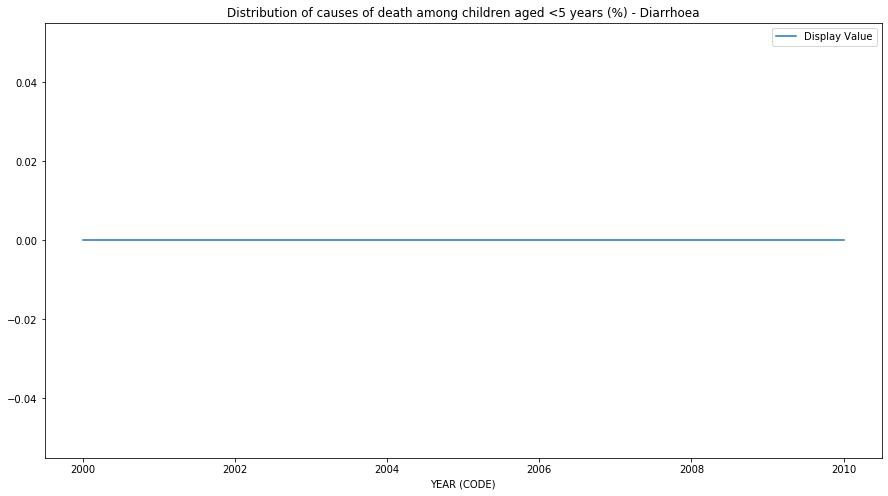

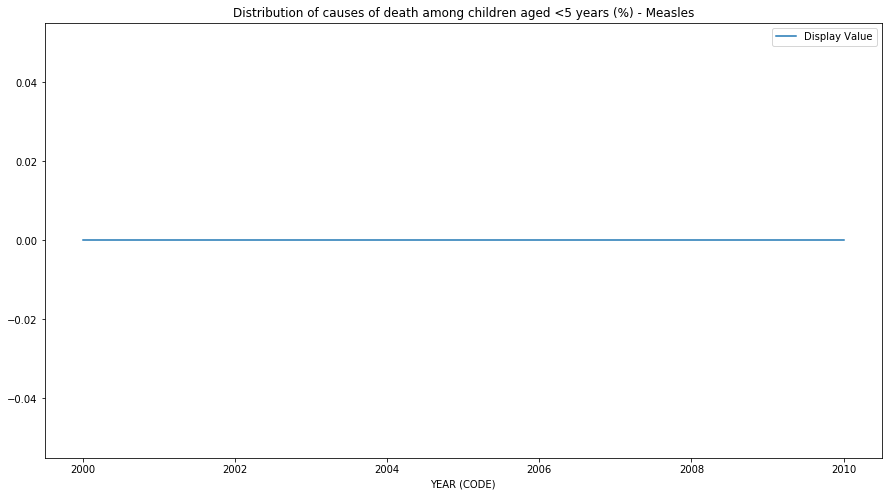

FileNotFoundError: [Errno 2] No such file or directory: 'images/Distribution of causes of death among children aged <5 years (%) - HIV/AIDS.png'

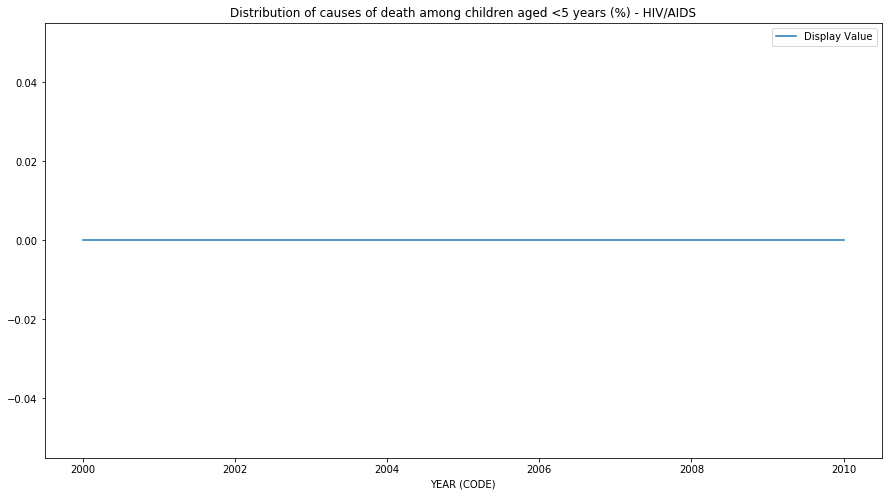

In [40]:
for i in range(len(diseases)):
    cur_dis = diseases[i]
    if len(cur_dis) > 2 and cur_dis['Display Value'].isna().sum() != len(cur_dis):
        fig, ax = plt.subplots(figsize=(15,8))
        cur_dis.plot(x='YEAR (CODE)', y='Display Value', ax=ax)
        plt.title(cur_dis['GHO (DISPLAY)'].iloc[0])
        plt.savefig('images/'+ cur_dis['GHO (DISPLAY)'].iloc[0])
        plt.show()

In [ ]:
print(diseases[0].iloc[0]['GHO (DISPLAY)'])

from statsmodels.tsa.seasonal import seasonal_decompose


for i in range (0,len(diseases)):
    diseases[i].rename(columns={"YEAR (CODE)": "period", "Display Value": "value"}, inplace=True)    
    print(diseases[i].columns)
    decompfreq = 12  # 12 months seasonality

    decomposition = seasonal_decompose(
        diseases[i].set_index("period").value.interpolate("linear"),
        freq=decompfreq,
        model=model)

    trend = decomposition.trend


    fig, ax = plt.subplots(figsize=(18,6))
    diseases[i].plot(x="period", y="value", ax=ax, label="observed", c='lightgrey', title=diseases[i].iloc[0]['GHO (DISPLAY)'])
    trend.plot(ax=ax, label="trend")
    plt.legend(loc='upper left')
